In [0]:
###Importing the Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

from keras.models import Sequential
from keras.layers.core import Dense,Dropout

Using TensorFlow backend.


In [0]:
###Importing the Dataset from Keras

from keras.datasets.fashion_mnist import load_data

(X_train_orig,Y_train_orig),(X_test_orig,Y_test_orig) = load_data()

In [0]:
###Label Dictionary

label_dict = {0:'T-shirt/top',
              1:'Trouser',
              2:'Pullover',
              3:'Dress',
              4:'Coat',
              5:'Sandal',
              6:'Shirt',
              7:'Sneaker',
              8:'Bag',
              9:'Ankle boot'
}

In [0]:
###Overview of the Imported Data

print("X_train Original Shape:",X_train_orig.shape)
print("Y_train Original Shape:",Y_train_orig.shape)
print("X_test Original Shape:",X_test_orig.shape)
print("Y_test Original Shape:",Y_test_orig.shape)

X_train Original Shape: (60000, 28, 28)
Y_train Original Shape: (60000,)
X_test Original Shape: (10000, 28, 28)
Y_test Original Shape: (10000,)


Sandal


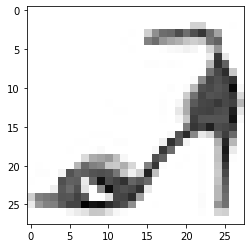

In [0]:
###Visualizing a Training Example

img_index = 2323 #Random Training Example
img = X_train_orig[img_index]
label = Y_train_orig[img_index]

print(label_dict[label])
plt.imshow(img,cmap='Greys')

In [0]:
###Preprocessing the Data

##Flattening the X Arrays(Converting the Images into a Vector)
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0],-1)
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0],-1)

##Printing the the Shapes of X Arrays after flattening

print("X_train Flattened Shape:",X_train_flatten.shape)
print("X_test Flattened Shape:",X_test_flatten.shape)

X_train Flattened Shape: (60000, 784)
X_test Flattened Shape: (10000, 784)


In [0]:
##Normalizing the Data
X_train = X_train_flatten / 255
X_test = X_test_flatten / 255

In [0]:
###One Hot Encoding

Y_train = keras.utils.to_categorical(Y_train_orig,10)
Y_test = keras.utils.to_categorical(Y_test_orig,10)

##Printing the the Shapes of Y Arrays after One Hot encoding

print("Y_train Shape:",Y_train.shape)
print("Y_test Shape:",Y_test.shape)

Y_train Shape: (60000, 10)
Y_test Shape: (10000, 10)


In [0]:
###Overview of Processed Data

print('X_train Shape:',X_train.shape)
print('Y_train Shape:',Y_train.shape)
print('X_test Shape:',X_test.shape)
print('Y_test Shape:',Y_test.shape)

X_train Shape: (60000, 784)
Y_train Shape: (60000, 10)
X_test Shape: (10000, 784)
Y_test Shape: (10000, 10)


In [0]:
###Creating the Model

#Defining the Input Shape
input_shape = ([784])


model = Sequential() #Allows us to create a model layer by layer


model.add(Dense(512,activation='relu',input_shape=input_shape)) #First Hidden Layer
model.add(Dropout(0.3))

model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(10,activation='softmax')) # Output Layer





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
###Compiling the Model(Choosing our optimizer,our loss function and our metric for perfromance)

model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['categorical_accuracy'])

In [0]:
###Hyperparameters

epochs = 50
batch_size = 64

In [0]:
###Training the model

history = model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test,Y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/50





60000/60000 [==============================] - 6s 100us/step - loss: 0.5962 - categorical_accuracy: 0.7842 - val_loss: 0.4306 - val_categorical_accuracy: 0.8438
Epoch 2/50
60000/60000 [==============================] - 5s 75us/step - loss: 0.4346 - categorical_accuracy: 0.8415 - val_loss: 0.4204 - val_categorical_accuracy: 0.8454
Epoch 3/50
60000/60000 [==============================] - 5s 76us/step - loss: 0.3985 - categorical_accuracy: 0.8561 - val_loss: 0.3813 - val_categorical_accuracy: 0.8628
Epoch 4/50
60000/60000 [==============================] - 5s 79us/step - loss: 0.3746 - categorical_accuracy: 0.8638 - val_loss: 0.3671 - val_categorical_accuracy: 0.8683
Epoch 5/50
60000/60000 [==============================] - 5s 78us/step - loss: 0.3625 - categorical_accuracy: 0.8687 - val_loss: 0.3650 - val_categorical_accuracy:

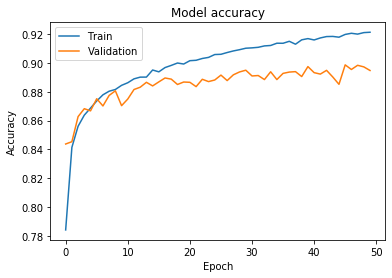

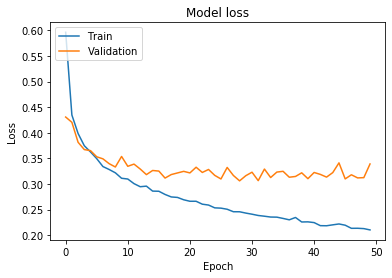

In [0]:
###Plotting the Results

##Accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()